In [2]:
from pathlib import Path
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_file = Path("original_data/owid-covid-data.csv")

In [4]:
data_file_df = pd.read_csv(data_file)
data_file_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [5]:
data_file_df["positive_rate"].count()

95927

In [6]:
data_file_df.count()


iso_code                                   323796
continent                                  308394
location                                   323796
date                                       323796
total_cases                                286549
                                            ...  
population                                 323796
excess_mortality_cumulative_absolute        11299
excess_mortality_cumulative                 11299
excess_mortality                            11299
excess_mortality_cumulative_per_million     11299
Length: 67, dtype: int64

In [7]:
#drop rows with nan values in positive rate column
data_file_df.dropna(subset=["positive_rate"], inplace=True)
data_file_df.count()


iso_code                                   95927
continent                                  95927
location                                   95927
date                                       95927
total_cases                                94900
                                           ...  
population                                 95927
excess_mortality_cumulative_absolute        5880
excess_mortality_cumulative                 5880
excess_mortality                            5880
excess_mortality_cumulative_per_million     5880
Length: 67, dtype: int64

In [8]:
#Dropping rows with incorrect country lables. 
data_file_df.dropna(subset=["continent"], inplace=True)
data_file_df.count()

iso_code                                   95927
continent                                  95927
location                                   95927
date                                       95927
total_cases                                94900
                                           ...  
population                                 95927
excess_mortality_cumulative_absolute        5880
excess_mortality_cumulative                 5880
excess_mortality                            5880
excess_mortality_cumulative_per_million     5880
Length: 67, dtype: int64

In [9]:
#checking the country labels are correct 
data_file_df["location"].unique()

array(['Afghanistan', 'Albania', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Grenada',
       'Guam', 'Guatemala', 'Gui

In [10]:
#dropping rows with cells that have nan in total_tests_per_thousand column
data_file_df.dropna(subset=["total_tests_per_thousand"], inplace=True)
data_file_df.count()

iso_code                                   75141
continent                                  75141
location                                   75141
date                                       75141
total_cases                                74114
                                           ...  
population                                 75141
excess_mortality_cumulative_absolute        5272
excess_mortality_cumulative                 5272
excess_mortality                            5272
excess_mortality_cumulative_per_million     5272
Length: 67, dtype: int64

In [11]:
data_file_df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
323403,ZWE,Africa,Zimbabwe,2022-06-08,253637.0,129.0,133.429,5515.0,2.0,1.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
323407,ZWE,Africa,Zimbabwe,2022-06-12,254098.0,67.0,108.571,5521.0,3.0,1.571,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
323411,ZWE,Africa,Zimbabwe,2022-06-16,254502.0,115.0,103.286,5526.0,1.0,1.571,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
323415,ZWE,Africa,Zimbabwe,2022-06-20,254831.0,30.0,96.571,5534.0,0.0,1.857,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
323417,ZWE,Africa,Zimbabwe,2022-06-22,255049.0,130.0,94.571,5541.0,5.0,2.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [12]:
#converting data type of date column to datetime
data_file_df['date'] = pd.to_datetime(data_file_df['date'])
data_file_df.dtypes


iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
population                                        float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

In [13]:
data_file_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
785,AFG,Asia,Afghanistan,2022-02-26,173116.0,69.0,178.000,7581.0,3.0,7.429,...,NaN,37.746,0.50,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
799,AFG,Asia,Afghanistan,2022-03-12,175960.0,88.0,241.571,7640.0,1.0,2.857,...,NaN,37.746,0.50,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
872,AFG,Asia,Afghanistan,2022-05-24,179771.0,55.0,64.286,7698.0,0.0,1.000,...,NaN,37.746,0.50,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
902,AFG,Asia,Afghanistan,2022-06-23,181934.0,126.0,87.714,7715.0,0.0,0.714,...,NaN,37.746,0.50,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2631,ALB,Europe,Albania,2020-03-14,23.0,8.0,3.286,1.0,0.0,0.143,...,51.2,NaN,2.89,78.57,0.795,2842318.0,NaN,NaN,NaN,NaN


In [14]:
#filtering data frame by date
filtered_df=data_file_df.loc[(data_file_df["date"]>"2020-03-01") & (data_file_df["date"]<"2022-12-31")]
filtered_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
785,AFG,Asia,Afghanistan,2022-02-26,173116.0,69.0,178.000,7581.0,3.0,7.429,...,NaN,37.746,0.50,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
799,AFG,Asia,Afghanistan,2022-03-12,175960.0,88.0,241.571,7640.0,1.0,2.857,...,NaN,37.746,0.50,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
872,AFG,Asia,Afghanistan,2022-05-24,179771.0,55.0,64.286,7698.0,0.0,1.000,...,NaN,37.746,0.50,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
902,AFG,Asia,Afghanistan,2022-06-23,181934.0,126.0,87.714,7715.0,0.0,0.714,...,NaN,37.746,0.50,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2631,ALB,Europe,Albania,2020-03-14,23.0,8.0,3.286,1.0,0.0,0.143,...,51.2,NaN,2.89,78.57,0.795,2842318.0,NaN,NaN,NaN,NaN


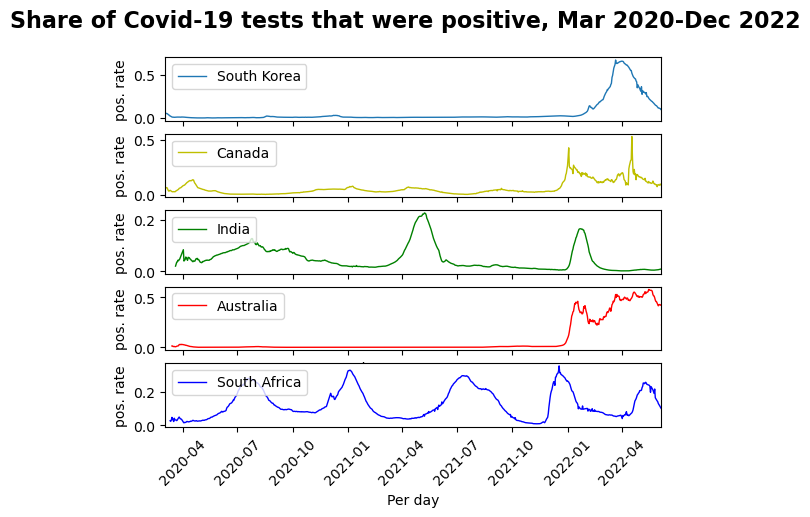

In [17]:
import matplotlib.pyplot as plt
#filtering dataframe to create lists of the positive rate for each country
location = ["Denmark", "Italy", "South Korea", "Canada", "India", "South Africa", "Australia"]

for i in location:
    data=filtered_df.loc[(filtered_df["location"]== i)]
    
    if i == location [0]:
        Denmark = data["positive_rate"].tolist()
        Denmark_date=data["date"].tolist()
    elif i == location [1]:
        Italy = data["positive_rate"].tolist()
        Italy_date=data["date"].tolist()
    elif i == location [2]:
        South_korea = data["positive_rate"].tolist()
        South_korea_date=data["date"].tolist()
    elif i == location [3]:
        Canada=data["positive_rate"].tolist()
        Canada_date=data["date"].tolist()
    elif i == location [4]:
        India=data["positive_rate"].tolist()
        India_date=data["date"].tolist()
    elif i == location [5]:
        South_africa=data["positive_rate"].tolist()
        South_africa_date=data["date"].tolist()
    elif i == location [6]:
        Australia= data["positive_rate"].tolist()
        Australia_date=data["date"].tolist()
        

#plotting a facet plot 
        
fig, (ax1, ax2, ax3,ax4, ax5) = plt.subplots(5, sharex=True)
fig.suptitle("Share of Covid-19 tests that were positive, Mar 2020-Dec 2022", fontsize=16, fontweight="bold")


ax1.set_xlim(min(Canada_date), max(Canada_date))
ax1.plot(South_korea_date, South_korea , linewidth=1, label="South Korea")
ax1.set_ylabel("pos. rate")
plt.xticks(rotation = 45)
ax1.legend()


ax2.plot(Canada_date, Canada, linewidth=1, color="y", label="Canada")
ax2.set_ylabel("pos. rate")
ax2.legend()

ax3.plot(India_date, India, linewidth=1, color="g", label="India")
ax3.set_ylabel("pos. rate")
ax3.legend()

ax4.plot(Australia_date, Australia, linewidth=1, color="r", label="Australia")
ax4.set_xlabel("Per day 2021 - Jun 2023")
ax4.set_ylabel("pos. rate")
ax4.legend()

ax5.plot(South_africa_date, South_africa, linewidth=1, color="b", label="South Africa")
ax5.set_xlabel("Per day")
ax5.set_ylabel("pos. rate")
ax5.legend()


plt.show()
    

In [35]:
data_file_df = data_file_df.loc[(data_file_df["date"]>"2020-06-16")]
data_file_df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
323403,ZWE,Africa,Zimbabwe,2022-06-08,253637.0,129.0,133.429,5515.0,2.0,1.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
323407,ZWE,Africa,Zimbabwe,2022-06-12,254098.0,67.0,108.571,5521.0,3.0,1.571,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
323411,ZWE,Africa,Zimbabwe,2022-06-16,254502.0,115.0,103.286,5526.0,1.0,1.571,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
323415,ZWE,Africa,Zimbabwe,2022-06-20,254831.0,30.0,96.571,5534.0,0.0,1.857,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
323417,ZWE,Africa,Zimbabwe,2022-06-22,255049.0,130.0,94.571,5541.0,5.0,2.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


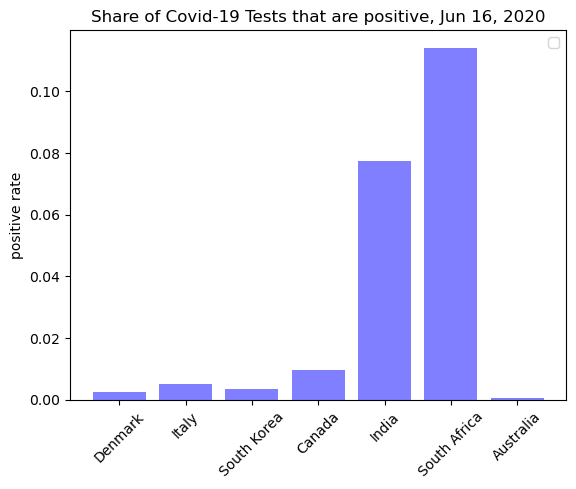

In [38]:
#plot positive rate of specific countries for the date 16th June 2020
import numpy as np
import matplotlib.pyplot as plt

country = ["Denmark", "Italy", "South Korea", "Canada", "India", "South Africa", "Australia"]
positive_rate_list=[]


for i in country:
    country_data = data_file_df.loc[(data_file_df["location"] == i)]["positive_rate"]
    positive_rate_list.append(country_data)

x_axis = np.arange(len(country))
y_values=[0.0025, 0.0051, 0.0035, 0.0095, 0.0775, 0.1142, 0.0005]



bar1=plt.bar(x_axis, y_values, color="blue", alpha=0.5, align="center")
plt.ylabel("positive rate")
plt.xticks(x_axis, country)
plt.xticks(rotation = 45)
plt.title('Share of Covid-19 Tests that are positive, Jun 16, 2020')
plt.legend()
plt.show()